In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

In [6]:
from sklearn.datasets import make_moons

In [10]:
x, y = make_moons(n_samples=500,  shuffle=True,  noise=0.2, random_state=3)

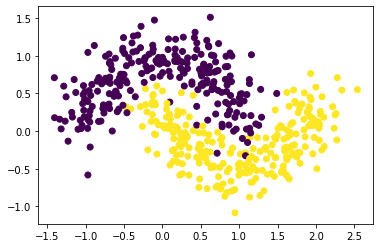

In [11]:
plt.scatter(x[:, 0], x[:, 1], c=y);

In [12]:
x.shape

(500, 2)

In [244]:
class NeuralNetowork:
    
    def __init__(self, input_size, hidden_layer, output_size):
        np.random.seed(0)
        
        # total layers including input layer(which is not a layer by the way) 
        layers = [input_size] + hidden_layer + [output_size]
        # params
        params = {}
        
        for i in range(len(layers) - 1):
            params['W'+str(i+1)] = np.random.randn(layers[i], layers[i + 1])*0.01
            params['b'+str(i+1)] = np.zeros((1, layers[i + 1]))
            
        self.params = params
        self.layers = layers
        self.losses = []
        
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def softmax(self, a):
        ea = np.exp(a)
        s = np.sum(ea, axis = 1, keepdims=True)
        return ea/s
    
    def forward_propagation(self, x):
        
        activations  = []
        activations.append(x)
        
        for layer in range(1, len(self.layers)): # starts from 1 because 1st layer is pseudo layer
            
            z = np.dot(activations[-1], self.params['W'+str(layer)]) + self.params['b'+str(layer)]
            
            # we use softmax as last layer activation function
            if layer == len(self.layers) - 1:
                a = self.softmax(z)
            else:
                a = self.relu(z)
                
            activations.append(a)
        
        self.activations = activations
        y_ = activations[-1]
        return y_
    
    def update_parameter(self, grads_dw, grads_db,learning_rate = 0.01):
        
        m = len(grads_dw) # or grads_b both have same length
        for i in range(m):
            self.params['W' + str(m - i)] -= learning_rate*grads_dw[i]
            self.params['b' + str(m - i)] -= learning_rate*grads_db[i]
        
    
    def compute_loss(self, y_oht,p):
        l = -np.mean(y_oht*np.log(p))
        self.losses.append(l)
    
    def backward_propagation(self, x, y):
        activations = self.activations
        y_ = activations[-1]
        
        m = x.shape[0]
        
        grads_dw = []
        grads_db = []
        
        # for first hidden layer (from last)
        delta = y_ - y #assuming that y is one hot encoded
        dw = (1/m)*np.dot(activations[-2].T, delta)
        db = (1/m)*np.sum(delta, axis=0)
        grads_dw.append(dw)
        grads_db.append(db)
        
        
        for i in range(len(self.layers)//2, 0, -1):
            delta = np.dot(delta, self.params['W'+str(i)].T)
            dw = (1/m)*np.dot(activations[i - 1].T, delta)
            db = (1/m)*np.sum(delta, axis=0)
            grads_dw.append(dw)
            grads_db.append(db)
            
        return grads_dw, grads_db
        
        
    def predict(self,x):
        y_out = self.forward_propagation(x)
        return np.argmax(y_out,axis=1)
    
        
    
    
    
    
    
    
    

In [245]:
model = NeuralNetowork(2, [4, 3, 3, 3], 2)

In [246]:
y_oht = pd.get_dummies(y).values

In [247]:
for i in range(2000):
    y_ = model.forward_propagation(x)
    model.compute_loss(y_oht, y_)
    grads_dw, grads_db = model.backward_propagation(x, y_oht)
    model.update_parameter(grads_dw, grads_db, learning_rate=0.001)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558978e-10  2.58885410e-09 -2.54870800e-08]
 [ 4.80030558e-11 -2.09722429e-10  2.06470203e-09]] [ 4.08545506e-15 -1.78491484e-14  1.75723672e-13]
[[-1.78890827e-09  7.54891666e-10 -4.87636591e-09]
 [-3.74012619e-09  1.57827550e-09 -1.01951700e-08]
 [ 2.40069547e-09 -1.01305642e-09  6.54403009e-09]] [ 6.96893660e-16 -2.94077371e-16  1.89964689e-15]
[[ 2.46083907e-10  2.95040962e-09 -2.24126172e-09]
 [ 9.30497947e-10  1.11561545e-08 -8.47470871e-09]
 [ 2.29882153e-10  2.75615957e-09 -2.09370079e-09]
 [ 2.81449932e-09  3.37442865e-08 -2.56336534e-08]] [-3.29247953e-18 -3.94746339e-17  2.99868916e-17]
[[ 6.09169645e-09  1.64469958e-08 -1.59133188e-08  1.96714336e-08]
 [-4.60774046e-09 -1.24404571e-08  1.20367854e-08 -1.48794119e-08]] [-1.15490553e-19 -3.11812243e-19  3.01695123e-19 -3.72944742e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558974e-10  2.58885408e-09 -2.54870798e-08]
 [ 4.80030558e-11 -2.09722429e-10 

[[-1.78890804e-09  7.54891126e-10 -4.87636524e-09]
 [-3.74012511e-09  1.57827412e-09 -1.01951669e-08]
 [ 2.40069535e-09 -1.01305578e-09  6.54402972e-09]] [ 6.83769908e-16 -2.88531257e-16  1.86386578e-15]
[[ 2.46083752e-10  2.95040866e-09 -2.24126119e-09]
 [ 9.30497436e-10  1.11561518e-08 -8.47470738e-09]
 [ 2.29882183e-10  2.75616076e-09 -2.09370188e-09]
 [ 2.81449797e-09  3.37442807e-08 -2.56336512e-08]] [-3.23035920e-18 -3.87319808e-17  2.94227237e-17]
[[ 6.09169516e-09  1.64469914e-08 -1.59133195e-08  1.96714282e-08]
 [-4.60773948e-09 -1.24404537e-08  1.20367859e-08 -1.48794078e-08]] [-1.13312683e-19 -3.05936760e-19  2.96020161e-19 -3.65912688e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558818e-10  2.58885340e-09 -2.54870731e-08]
 [ 4.80030547e-11 -2.09722424e-10  2.06470198e-09]] [ 4.00651344e-15 -1.75042771e-14  1.72327638e-13]
[[-1.78890803e-09  7.54891112e-10 -4.87636522e-09]
 [-3.74012508e-09  1.57827408e-09 -1.01951669e-08]
 [ 2.40069535e-09 -1.01305576e-09 

[[-1.78890781e-09  7.54890586e-10 -4.87636457e-09]
 [-3.74012403e-09  1.57827274e-09 -1.01951639e-08]
 [ 2.40069524e-09 -1.01305513e-09  6.54402936e-09]] [ 6.70899642e-16 -2.83110951e-16  1.82876365e-15]
[[ 2.46083597e-10  2.95040770e-09 -2.24126066e-09]
 [ 9.30496924e-10  1.11561490e-08 -8.47470605e-09]
 [ 2.29882212e-10  2.75616195e-09 -2.09370297e-09]
 [ 2.81449663e-09  3.37442748e-08 -2.56336491e-08]] [-3.16973610e-18 -3.80020603e-17  2.88684058e-17]
[[ 6.09169388e-09  1.64469870e-08 -1.59133201e-08  1.96714228e-08]
 [-4.60773851e-09 -1.24404504e-08  1.20367864e-08 -1.48794037e-08]] [-1.11181247e-19 -3.00179067e-19  2.90441668e-19 -3.59032041e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558662e-10  2.58885272e-09 -2.54870664e-08]
 [ 4.80030537e-11 -2.09722419e-10  2.06470194e-09]] [ 3.93110739e-15 -1.71744559e-14  1.69082762e-13]
[[-1.78890780e-09  7.54890572e-10 -4.87636455e-09]
 [-3.74012400e-09  1.57827270e-09 -1.01951638e-08]
 [ 2.40069523e-09 -1.01305512e-09 

[[ 6.09169245e-09  1.64469821e-08 -1.59133209e-08  1.96714169e-08]
 [-4.60773743e-09 -1.24404467e-08  1.20367870e-08 -1.48793992e-08]] [-1.08872305e-19 -2.93943686e-19  2.84399676e-19 -3.51565379e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558489e-10  2.58885197e-09 -2.54870590e-08]
 [ 4.80030525e-11 -2.09722414e-10  2.06470188e-09]] [ 3.84912685e-15 -1.68185747e-14  1.65565735e-13]
[[-1.78890754e-09  7.54889975e-10 -4.87636381e-09]
 [-3.74012280e-09  1.57827118e-09 -1.01951605e-08]
 [ 2.40069510e-09 -1.01305441e-09  6.54402894e-09]] [ 6.56636258e-16 -2.77059124e-16  1.78989099e-15]
[[ 2.46083422e-10  2.95040661e-09 -2.24126006e-09]
 [ 9.30496346e-10  1.11561459e-08 -8.47470455e-09]
 [ 2.29882246e-10  2.75616330e-09 -2.09370421e-09]
 [ 2.81449511e-09  3.37442681e-08 -2.56336466e-08]] [-3.10206526e-18 -3.71934996e-17  2.82542375e-17]
[[ 6.09169242e-09  1.64469820e-08 -1.59133209e-08  1.96714167e-08]
 [-4.60773741e-09 -1.24404466e-08  1.20367870e-08 -1.48793991e-08]] [

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558321e-10  2.58885123e-09 -2.54870517e-08]
 [ 4.80030514e-11 -2.09722409e-10  2.06470183e-09]] [ 3.77134619e-15 -1.64762826e-14  1.62208094e-13]
[[-1.78890729e-09  7.54889393e-10 -4.87636309e-09]
 [-3.74012164e-09  1.57826969e-09 -1.01951572e-08]
 [ 2.40069498e-09 -1.01305371e-09  6.54402854e-09]] [ 6.43293443e-16 -2.71464857e-16  1.75355683e-15]
[[ 2.46083256e-10  2.95040558e-09 -2.24125949e-09]
 [ 9.30495794e-10  1.11561430e-08 -8.47470311e-09]
 [ 2.29882278e-10  2.75616459e-09 -2.09370538e-09]
 [ 2.81449366e-09  3.37442618e-08 -2.56336443e-08]] [-3.03926602e-18 -3.64392574e-17  2.76813425e-17]
[[ 6.09169103e-09  1.64469773e-08 -1.59133217e-08  1.96714109e-08]
 [-4.60773635e-09 -1.24404430e-08  1.20367876e-08 -1.48793947e-08]] [-1.06611263e-19 -2.87833455e-19  2.78498769e-19 -3.44268852e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558317e-10  2.58885121e-09 -2.54870515e-08]
 [ 4.80030513e-11 -2.09722409e-10 

[[ 6.09168977e-09  1.64469730e-08 -1.59133223e-08  1.96714057e-08]
 [-4.60773541e-09 -1.24404398e-08  1.20367881e-08 -1.48793907e-08]] [-1.04650596e-19 -2.82543708e-19  2.73384887e-19 -3.37942760e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558165e-10  2.58885055e-09 -2.54870450e-08]
 [ 4.80030503e-11 -2.09722405e-10  2.06470179e-09]] [ 3.70031284e-15 -1.61662090e-14  1.59154467e-13]
[[-1.78890706e-09  7.54888853e-10 -4.87636242e-09]
 [-3.74012056e-09  1.57826830e-09 -1.01951542e-08]
 [ 2.40069486e-09 -1.01305307e-09  6.54402818e-09]] [ 6.31184558e-16 -2.66364865e-16  1.72054233e-15]
[[ 2.46083101e-10  2.95040462e-09 -2.24125897e-09]
 [ 9.30495283e-10  1.11561402e-08 -8.47470178e-09]
 [ 2.29882307e-10  2.75616578e-09 -2.09370648e-09]
 [ 2.81449232e-09  3.37442559e-08 -2.56336421e-08]] [-2.98215610e-18 -3.57531811e-17  2.71603571e-17]
[[ 6.09168974e-09  1.64469728e-08 -1.59133224e-08  1.96714055e-08]
 [-4.60773538e-09 -1.24404397e-08  1.20367881e-08 -1.48793906e-08]] [

[[ 2.46082975e-10  2.95040384e-09 -2.24125854e-09]
 [ 9.30494865e-10  1.11561380e-08 -8.47470069e-09]
 [ 2.29882331e-10  2.75616675e-09 -2.09370737e-09]
 [ 2.81449122e-09  3.37442511e-08 -2.56336404e-08]] [-2.93646841e-18 -3.52027943e-17  2.67418551e-17]
[[ 6.09168869e-09  1.64469693e-08 -1.59133229e-08  1.96714011e-08]
 [-4.60773458e-09 -1.24404369e-08  1.20367885e-08 -1.48793873e-08]] [-1.02994468e-19 -2.78066332e-19  2.69043935e-19 -3.32588850e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92558034e-10  2.58884998e-09 -2.54870393e-08]
 [ 4.80030494e-11 -2.09722401e-10  2.06470175e-09]] [ 3.64136672e-15 -1.59092930e-14  1.56625220e-13]
[[-1.78890687e-09  7.54888398e-10 -4.87636186e-09]
 [-3.74011964e-09  1.57826714e-09 -1.01951516e-08]
 [ 2.40069476e-09 -1.01305253e-09  6.54402787e-09]] [ 6.21173984e-16 -2.62116134e-16  1.69319669e-15]
[[ 2.46082971e-10  2.95040381e-09 -2.24125852e-09]
 [ 9.30494852e-10  1.11561379e-08 -8.47470066e-09]
 [ 2.29882332e-10  2.75616678e-09 

[[-1.78890663e-09  7.54887844e-10 -4.87636117e-09]
 [-3.74011853e-09  1.57826573e-09 -1.01951485e-08]
 [ 2.40069464e-09 -1.01305187e-09  6.54402749e-09]] [ 6.09165252e-16 -2.57065474e-16  1.66048203e-15]
[[ 2.46082812e-10  2.95040283e-09 -2.24125798e-09]
 [ 9.30494327e-10  1.11561351e-08 -8.47469929e-09]
 [ 2.29882363e-10  2.75616800e-09 -2.09370851e-09]
 [ 2.81448981e-09  3.37442449e-08 -2.56336381e-08]] [-2.87791948e-18 -3.45059640e-17  2.62120453e-17]
[[ 6.09168733e-09  1.64469646e-08 -1.59133236e-08  1.96713954e-08]
 [-4.60773356e-09 -1.24404334e-08  1.20367891e-08 -1.48793830e-08]] [-1.00954561e-19 -2.72565223e-19  2.63718044e-19 -3.25989921e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92557870e-10  2.58884926e-09 -2.54870323e-08]
 [ 4.80030483e-11 -2.09722396e-10  2.06470170e-09]] [ 3.56929568e-15 -1.55946042e-14  1.53525609e-13]
[[-1.78890662e-09  7.54887830e-10 -4.87636116e-09]
 [-3.74011851e-09  1.57826569e-09 -1.01951485e-08]
 [ 2.40069464e-09 -1.01305185e-09 

[[ 6.09168598e-09  1.64469600e-08 -1.59133244e-08  1.96713898e-08]
 [-4.60773253e-09 -1.24404299e-08  1.20367896e-08 -1.48793787e-08]] [-9.89560203e-20 -2.67170140e-19  2.58495318e-19 -3.19531480e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92557705e-10  2.58884854e-09 -2.54870252e-08]
 [ 4.80030472e-11 -2.09722391e-10  2.06470165e-09]] [ 3.49862706e-15 -1.52857284e-14  1.50485437e-13]
[[-1.78890638e-09  7.54887262e-10 -4.87636045e-09]
 [-3.74011737e-09  1.57826424e-09 -1.01951453e-08]
 [ 2.40069452e-09 -1.01305118e-09  6.54402709e-09]] [ 5.96798652e-16 -2.51834876e-16  1.62682021e-15]
[[ 2.46082646e-10  2.95040179e-09 -2.24125741e-09]
 [ 9.30493775e-10  1.11561321e-08 -8.47469786e-09]
 [ 2.29882395e-10  2.75616928e-09 -2.09370969e-09]
 [ 2.81448836e-09  3.37442386e-08 -2.56336357e-08]] [-2.81945674e-18 -3.38045106e-17  2.56797748e-17]
[[ 6.09168594e-09  1.64469598e-08 -1.59133244e-08  1.96713896e-08]
 [-4.60773251e-09 -1.24404298e-08  1.20367896e-08 -1.48793786e-08]] [

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92557549e-10  2.58884786e-09 -2.54870185e-08]
 [ 4.80030461e-11 -2.09722386e-10  2.06470160e-09]] [ 3.43298740e-15 -1.49966593e-14  1.47647866e-13]
[[-1.78890615e-09  7.54886722e-10 -4.87635978e-09]
 [-3.74011628e-09  1.57826286e-09 -1.01951423e-08]
 [ 2.40069440e-09 -1.01305053e-09  6.54402673e-09]] [ 5.85567808e-16 -2.47112186e-16  1.59612829e-15]
[[ 2.46082491e-10  2.95040083e-09 -2.24125688e-09]
 [ 9.30493264e-10  1.11561294e-08 -8.47469653e-09]
 [ 2.29882424e-10  2.75617047e-09 -2.09371078e-09]
 [ 2.81448702e-09  3.37442327e-08 -2.56336336e-08]] [-2.76673518e-18 -3.31688412e-17  2.51963181e-17]
[[ 6.09168465e-09  1.64469554e-08 -1.59133251e-08  1.96713842e-08]
 [-4.60773153e-09 -1.24404265e-08  1.20367901e-08 -1.48793745e-08]] [-9.70400649e-20 -2.62005462e-19  2.53496169e-19 -3.13365543e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92557545e-10  2.58884784e-09 -2.54870183e-08]
 [ 4.80030461e-11 -2.09722386e-10 

[[-1.78890597e-09  7.54886324e-10 -4.87635929e-09]
 [-3.74011549e-09  1.57826184e-09 -1.01951400e-08]
 [ 2.40069431e-09 -1.01305006e-09  6.54402646e-09]] [ 5.77423444e-16 -2.43674926e-16  1.57398096e-15]
[[ 2.46082377e-10  2.95040013e-09 -2.24125649e-09]
 [ 9.30492887e-10  1.11561273e-08 -8.47469555e-09]
 [ 2.29882446e-10  2.75617135e-09 -2.09371159e-09]
 [ 2.81448603e-09  3.37442284e-08 -2.56336320e-08]] [-2.72818004e-18 -3.27073404e-17  2.48459709e-17]
[[ 6.09168370e-09  1.64469522e-08 -1.59133256e-08  1.96713803e-08]
 [-4.60773081e-09 -1.24404240e-08  1.20367905e-08 -1.48793715e-08]] [-9.56902550e-20 -2.58361579e-19  2.49973068e-19 -3.09005070e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92557430e-10  2.58884734e-09 -2.54870133e-08]
 [ 4.80030453e-11 -2.09722383e-10  2.06470157e-09]] [ 3.38354616e-15 -1.47819521e-14  1.45527083e-13]
[[-1.78890597e-09  7.54886310e-10 -4.87635927e-09]
 [-3.74011546e-09  1.57826180e-09 -1.01951400e-08]
 [ 2.40069431e-09 -1.01305004e-09 

[[-1.78890580e-09  7.54885912e-10 -4.87635878e-09]
 [-3.74011466e-09  1.57826078e-09 -1.01951377e-08]
 [ 2.40069422e-09 -1.01304957e-09  6.54402617e-09]] [ 5.69084520e-16 -2.40151310e-16  1.55130216e-15]
[[ 2.46082259e-10  2.95039939e-09 -2.24125609e-09]
 [ 9.30492497e-10  1.11561252e-08 -8.47469453e-09]
 [ 2.29882469e-10  2.75617226e-09 -2.09371242e-09]
 [ 2.81448501e-09  3.37442239e-08 -2.56336303e-08]] [-2.68892928e-18 -3.22359293e-17  2.44878767e-17]
[[ 6.09168272e-09  1.64469488e-08 -1.59133261e-08  1.96713761e-08]
 [-4.60773007e-09 -1.24404215e-08  1.20367909e-08 -1.48793684e-08]] [-9.43116030e-20 -2.54633827e-19  2.46370041e-19 -3.04556718e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92557311e-10  2.58884682e-09 -2.54870082e-08]
 [ 4.80030445e-11 -2.09722379e-10  2.06470153e-09]] [ 3.33458500e-15 -1.45687152e-14  1.43430240e-13]
[[-1.78890579e-09  7.54885898e-10 -4.87635876e-09]
 [-3.74011463e-09  1.57826075e-09 -1.01951376e-08]
 [ 2.40069422e-09 -1.01304955e-09 

 [ 2.40069411e-09 -1.01304896e-09  6.54402583e-09]] [ 5.58961704e-16 -2.35869158e-16  1.52365181e-15]
[[ 2.46082113e-10  2.95039848e-09 -2.24125559e-09]
 [ 9.30492012e-10  1.11561226e-08 -8.47469327e-09]
 [ 2.29882497e-10  2.75617339e-09 -2.09371346e-09]
 [ 2.81448373e-09  3.37442183e-08 -2.56336283e-08]] [-2.64070896e-18 -3.16609362e-17  2.40512693e-17]
[[ 6.09168150e-09  1.64469446e-08 -1.59133268e-08  1.96713710e-08]
 [-4.60772915e-09 -1.24404183e-08  1.20367914e-08 -1.48793645e-08]] [-9.26316257e-20 -2.50093135e-19  2.41978599e-19 -2.99131035e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92557163e-10  2.58884617e-09 -2.54870018e-08]
 [ 4.80030435e-11 -2.09722375e-10  2.06470149e-09]] [ 3.27511033e-15 -1.43087434e-14  1.40864091e-13]
[[-1.78890557e-09  7.54885386e-10 -4.87635813e-09]
 [-3.74011361e-09  1.57825944e-09 -1.01951348e-08]
 [ 2.40069411e-09 -1.01304894e-09  6.54402582e-09]] [ 5.58660214e-16 -2.35740423e-16  1.52285676e-15]
[[ 2.46082109e-10  2.95039846e-09 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556995e-10  2.58884544e-09 -2.54869946e-08]
 [ 4.80030424e-11 -2.09722370e-10  2.06470144e-09]] [ 3.20851874e-15 -1.40186838e-14  1.38004677e-13]
[[-1.78890532e-09  7.54884804e-10 -4.87635741e-09]
 [-3.74011244e-09  1.57825795e-09 -1.01951315e-08]
 [ 2.40069398e-09 -1.01304825e-09  6.54402542e-09]] [ 5.47320246e-16 -2.30951312e-16  1.49194616e-15]
[[ 2.46081942e-10  2.95039742e-09 -2.24125501e-09]
 [ 9.30491447e-10  1.11561196e-08 -8.47469180e-09]
 [ 2.29882529e-10  2.75617470e-09 -2.09371466e-09]
 [ 2.81448225e-09  3.37442118e-08 -2.56336259e-08]] [-2.58559295e-18 -3.10027543e-17  2.35510150e-17]
[[ 6.09168008e-09  1.64469398e-08 -1.59133275e-08  1.96713651e-08]
 [-4.60772807e-09 -1.24404146e-08  1.20367920e-08 -1.48793600e-08]] [-9.07027364e-20 -2.44883909e-19  2.36943835e-19 -2.92897786e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556991e-10  2.58884542e-09 -2.54869944e-08]
 [ 4.80030423e-11 -2.09722370e-10 

[[-1.78890509e-09  7.54884264e-10 -4.87635674e-09]
 [-3.74011136e-09  1.57825657e-09 -1.01951285e-08]
 [ 2.40069387e-09 -1.01304761e-09  6.54402505e-09]] [ 5.37017073e-16 -2.26592874e-16  1.46382261e-15]
[[ 2.46081787e-10  2.95039646e-09 -2.24125448e-09]
 [ 9.30490936e-10  1.11561168e-08 -8.47469047e-09]
 [ 2.29882559e-10  2.75617589e-09 -2.09371575e-09]
 [ 2.81448091e-09  3.37442060e-08 -2.56336237e-08]] [-2.53718354e-18 -3.04185506e-17  2.31074281e-17]
[[ 6.09167879e-09  1.64469353e-08 -1.59133282e-08  1.96713597e-08]
 [-4.60772710e-09 -1.24404113e-08  1.20367925e-08 -1.48793559e-08]] [-8.89953364e-20 -2.40276169e-19  2.32489355e-19 -2.87382807e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556835e-10  2.58884474e-09 -2.54869877e-08]
 [ 4.80030413e-11 -2.09722365e-10  2.06470139e-09]] [ 3.14674361e-15 -1.37474576e-14  1.35346290e-13]
[[-1.78890508e-09  7.54884249e-10 -4.87635672e-09]
 [-3.74011133e-09  1.57825653e-09 -1.01951284e-08]
 [ 2.40069386e-09 -1.01304759e-09 

[[-1.78890486e-09  7.54883724e-10 -4.87635607e-09]
 [-3.74011028e-09  1.57825519e-09 -1.01951255e-08]
 [ 2.40069375e-09 -1.01304697e-09  6.54402469e-09]] [ 5.26919681e-16 -2.22370516e-16  1.43630832e-15]
[[ 2.46081633e-10  2.95039551e-09 -2.24125395e-09]
 [ 9.30490424e-10  1.11561141e-08 -8.47468914e-09]
 [ 2.29882589e-10  2.75617708e-09 -2.09371685e-09]
 [ 2.81447956e-09  3.37442001e-08 -2.56336215e-08]] [-2.48972015e-18 -2.98463782e-17  2.26733390e-17]
[[ 6.09167750e-09  1.64469309e-08 -1.59133289e-08  1.96713543e-08]
 [-4.60772612e-09 -1.24404080e-08  1.20367930e-08 -1.48793519e-08]] [-8.73211096e-20 -2.35763640e-19  2.28105907e-19 -2.81980087e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556679e-10  2.58884406e-09 -2.54869810e-08]
 [ 4.80030402e-11 -2.09722360e-10  2.06470134e-09]] [ 3.08752199e-15 -1.34885107e-14  1.32793172e-13]
[[-1.78890485e-09  7.54883710e-10 -4.87635605e-09]
 [-3.74011025e-09  1.57825515e-09 -1.01951254e-08]
 [ 2.40069375e-09 -1.01304695e-09 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556511e-10  2.58884332e-09 -2.54869737e-08]
 [ 4.80030391e-11 -2.09722355e-10  2.06470129e-09]] [ 3.02464000e-15 -1.32150302e-14  1.30099945e-13]
[[-1.78890460e-09  7.54883127e-10 -4.87635533e-09]
 [-3.74010908e-09  1.57825366e-09 -1.01951221e-08]
 [ 2.40069362e-09 -1.01304626e-09  6.54402428e-09]] [ 5.15945305e-16 -2.17728355e-16  1.40647384e-15]
[[ 2.46081462e-10  2.95039445e-09 -2.24125337e-09]
 [ 9.30489859e-10  1.11561110e-08 -8.47468766e-09]
 [ 2.29882621e-10  2.75617840e-09 -2.09371805e-09]
 [ 2.81447808e-09  3.37441936e-08 -2.56336191e-08]] [-2.43767284e-18 -2.92254844e-17  2.22012341e-17]
[[ 6.09167607e-09  1.64469261e-08 -1.59133296e-08  1.96713483e-08]
 [-4.60772504e-09 -1.24404043e-08  1.20367936e-08 -1.48793474e-08]] [-8.55052927e-20 -2.30858128e-19  2.23368650e-19 -2.76115390e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556506e-10  2.58884330e-09 -2.54869735e-08]
 [ 4.80030390e-11 -2.09722355e-10 

[[-1.78890436e-09  7.54882559e-10 -4.87635463e-09]
 [-3.74010794e-09  1.57825221e-09 -1.01951189e-08]
 [ 2.40069350e-09 -1.01304558e-09  6.54402389e-09]] [ 5.05729573e-16 -2.13410331e-16  1.37855672e-15]
[[ 2.46081299e-10  2.95039344e-09 -2.24125281e-09]
 [ 9.30489321e-10  1.11561081e-08 -8.47468626e-09]
 [ 2.29882653e-10  2.75617965e-09 -2.09371920e-09]
 [ 2.81447667e-09  3.37441874e-08 -2.56336169e-08]] [-2.38919259e-18 -2.86469457e-17  2.17612259e-17]
[[ 6.09167472e-09  1.64469214e-08 -1.59133304e-08  1.96713426e-08]
 [-4.60772402e-09 -1.24404008e-08  1.20367941e-08 -1.48793431e-08]] [-8.38123550e-20 -2.26281398e-19  2.18944292e-19 -2.70648772e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556342e-10  2.58884259e-09 -2.54869665e-08]
 [ 4.80030379e-11 -2.09722350e-10  2.06470124e-09]] [ 2.96337726e-15 -1.29466811e-14  1.27455872e-13]
[[-1.78890435e-09  7.54882544e-10 -4.87635461e-09]
 [-3.74010792e-09  1.57825217e-09 -1.01951189e-08]
 [ 2.40069349e-09 -1.01304556e-09 

[[ 2.46081145e-10  2.95039248e-09 -2.24125228e-09]
 [ 9.30488809e-10  1.11561054e-08 -8.47468493e-09]
 [ 2.29882682e-10  2.75618084e-09 -2.09372029e-09]
 [ 2.81447532e-09  3.37441815e-08 -2.56336147e-08]] [-2.34415405e-18 -2.81067182e-17  2.13518320e-17]
[[ 6.09167343e-09  1.64469170e-08 -1.59133311e-08  1.96713372e-08]
 [-4.60772304e-09 -1.24403974e-08  1.20367947e-08 -1.48793390e-08]] [-8.22292074e-20 -2.22012987e-19  2.14817415e-19 -2.65542500e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556186e-10  2.58884191e-09 -2.54869597e-08]
 [ 4.80030369e-11 -2.09722346e-10  2.06470120e-09]] [ 2.90755571e-15 -1.27029186e-14  1.25062537e-13]
[[-1.78890412e-09  7.54882005e-10 -4.87635394e-09]
 [-3.74010683e-09  1.57825079e-09 -1.01951158e-08]
 [ 2.40069338e-09 -1.01304492e-09  6.54402352e-09]] [ 4.95977337e-16 -2.09290105e-16  1.35193034e-15]
[[ 2.46081141e-10  2.95039245e-09 -2.24125227e-09]
 [ 9.30488796e-10  1.11561053e-08 -8.47468490e-09]
 [ 2.29882683e-10  2.75618087e-09 

[[-1.78890390e-09  7.54881493e-10 -4.87635331e-09]
 [-3.74010581e-09  1.57824949e-09 -1.01951130e-08]
 [ 2.40069327e-09 -1.01304431e-09  6.54402317e-09]] [ 4.87118619e-16 -2.05536583e-16  1.32784251e-15]
[[ 2.46080994e-10  2.95039154e-09 -2.24125177e-09]
 [ 9.30488311e-10  1.11561027e-08 -8.47468364e-09]
 [ 2.29882711e-10  2.75618200e-09 -2.09372136e-09]
 [ 2.81447402e-09  3.37441758e-08 -2.56336126e-08]] [-2.30133399e-18 -2.75917865e-17  2.09598870e-17]
[[ 6.09167217e-09  1.64469127e-08 -1.59133317e-08  1.96713320e-08]
 [-4.60772209e-09 -1.24403942e-08  1.20367952e-08 -1.48793350e-08]] [-8.07232159e-20 -2.17947957e-19  2.10876727e-19 -2.60674257e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92556034e-10  2.58884124e-09 -2.54869532e-08]
 [ 4.80030358e-11 -2.09722341e-10  2.06470115e-09]] [ 2.85418867e-15 -1.24696065e-14  1.22764417e-13]
[[-1.78890389e-09  7.54881479e-10 -4.87635329e-09]
 [-3.74010578e-09  1.57824945e-09 -1.01951129e-08]
 [ 2.40069326e-09 -1.01304429e-09 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555919e-10  2.58884074e-09 -2.54869482e-08]
 [ 4.80030350e-11 -2.09722338e-10  2.06470112e-09]] [ 2.81450774e-15 -1.22969183e-14  1.21057893e-13]
[[-1.78890372e-09  7.54881081e-10 -4.87635280e-09]
 [-3.74010498e-09  1.57824843e-09 -1.01951107e-08]
 [ 2.40069318e-09 -1.01304382e-09  6.54402289e-09]] [ 4.80095700e-16 -2.02588732e-16  1.30870309e-15]
[[ 2.46080876e-10  2.95039081e-09 -2.24125137e-09]
 [ 9.30487921e-10  1.11561006e-08 -8.47468262e-09]
 [ 2.29882734e-10  2.75618291e-09 -2.09372219e-09]
 [ 2.81447299e-09  3.37441713e-08 -2.56336109e-08]] [-2.26823893e-18 -2.71946297e-17  2.06583975e-17]
[[ 6.09167119e-09  1.64469093e-08 -1.59133323e-08  1.96713279e-08]
 [-4.60772135e-09 -1.24403916e-08  1.20367956e-08 -1.48793319e-08]] [-7.95632374e-20 -2.14814702e-19  2.07844124e-19 -2.56923450e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555915e-10  2.58884072e-09 -2.54869481e-08]
 [ 4.80030350e-11 -2.09722338e-10 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555800e-10  2.58884022e-09 -2.54869431e-08]
 [ 4.80030342e-11 -2.09722334e-10  2.06470108e-09]] [ 2.77395251e-15 -1.21193385e-14  1.19315592e-13]
[[-1.78890354e-09  7.54880669e-10 -4.87635229e-09]
 [-3.74010416e-09  1.57824738e-09 -1.01951084e-08]
 [ 2.40069309e-09 -1.01304333e-09  6.54402261e-09]] [ 4.73176890e-16 -1.99666415e-16  1.28984215e-15]
[[ 2.46080758e-10  2.95039008e-09 -2.24125096e-09]
 [ 9.30487531e-10  1.11560985e-08 -8.47468160e-09]
 [ 2.29882756e-10  2.75618381e-09 -2.09372302e-09]
 [ 2.81447197e-09  3.37441668e-08 -2.56336093e-08]] [-2.23540867e-18 -2.68026805e-17  2.03605723e-17]
[[ 6.09167021e-09  1.64469060e-08 -1.59133328e-08  1.96713238e-08]
 [-4.60772061e-09 -1.24403891e-08  1.20367960e-08 -1.48793288e-08]] [-7.84176419e-20 -2.11718439e-19  2.04845786e-19 -2.53224205e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555796e-10  2.58884020e-09 -2.54869429e-08]
 [ 4.80030342e-11 -2.09722334e-10 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555681e-10  2.58883970e-09 -2.54869380e-08]
 [ 4.80030334e-11 -2.09722331e-10  2.06470105e-09]] [ 2.73392669e-15 -1.19462300e-14  1.17597959e-13]
[[-1.78890337e-09  7.54880257e-10 -4.87635178e-09]
 [-3.74010333e-09  1.57824632e-09 -1.01951060e-08]
 [ 2.40069300e-09 -1.01304284e-09  6.54402233e-09]] [ 4.66372953e-16 -1.96777368e-16  1.27131687e-15]
[[ 2.46080640e-10  2.95038935e-09 -2.24125056e-09]
 [ 9.30487141e-10  1.11560964e-08 -8.47468059e-09]
 [ 2.29882779e-10  2.75618472e-09 -2.09372385e-09]
 [ 2.81447094e-09  3.37441624e-08 -2.56336076e-08]] [-2.20337325e-18 -2.64169654e-17  2.00670355e-17]
[[ 6.09166922e-09  1.64469026e-08 -1.59133333e-08  1.96713196e-08]
 [-4.60771986e-09 -1.24403865e-08  1.20367964e-08 -1.48793257e-08]] [-7.72862805e-20 -2.08663390e-19  2.01896775e-19 -2.49575214e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555677e-10  2.58883968e-09 -2.54869378e-08]
 [ 4.80030334e-11 -2.09722331e-10 

[[ 6.09166807e-09  1.64468987e-08 -1.59133339e-08  1.96713148e-08]
 [-4.60771899e-09 -1.24403836e-08  1.20367968e-08 -1.48793220e-08]] [-7.59819259e-20 -2.05154450e-19  1.98501867e-19 -2.45371019e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555537e-10  2.58883907e-09 -2.54869318e-08]
 [ 4.80030325e-11 -2.09722327e-10  2.06470100e-09]] [ 2.68684836e-15 -1.17371017e-14  1.15555183e-13]
[[-1.78890315e-09  7.54879760e-10 -4.87635116e-09]
 [-3.74010234e-09  1.57824505e-09 -1.01951033e-08]
 [ 2.40069289e-09 -1.01304225e-09  6.54402199e-09]] [ 4.58281362e-16 -1.93398086e-16  1.24926355e-15]
[[ 2.46080498e-10  2.95038846e-09 -2.24125007e-09]
 [ 9.30486670e-10  1.11560939e-08 -8.47467936e-09]
 [ 2.29882806e-10  2.75618582e-09 -2.09372486e-09]
 [ 2.81446970e-09  3.37441569e-08 -2.56336056e-08]] [-2.16510632e-18 -2.59589154e-17  1.97196758e-17]
[[ 6.09166804e-09  1.64468985e-08 -1.59133339e-08  1.96713147e-08]
 [-4.60771897e-09 -1.24403835e-08  1.20367968e-08 -1.48793219e-08]] [

[[ 6.09166685e-09  1.64468945e-08 -1.59133346e-08  1.96713097e-08]
 [-4.60771807e-09 -1.24403804e-08  1.20367973e-08 -1.48793181e-08]] [-7.46279073e-20 -2.01484468e-19  1.94956954e-19 -2.40997483e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555390e-10  2.58883843e-09 -2.54869254e-08]
 [ 4.80030315e-11 -2.09722322e-10  2.06470096e-09]] [ 2.63863020e-15 -1.15282111e-14  1.13492465e-13]
[[-1.78890293e-09  7.54879248e-10 -4.87635053e-09]
 [-3.74010131e-09  1.57824374e-09 -1.01951004e-08]
 [ 2.40069278e-09 -1.01304164e-09  6.54402164e-09]] [ 4.50105746e-16 -1.89939305e-16  1.22691543e-15]
[[ 2.46080351e-10  2.95038755e-09 -2.24124957e-09]
 [ 9.30486185e-10  1.11560913e-08 -8.47467810e-09]
 [ 2.29882834e-10  2.75618695e-09 -2.09372589e-09]
 [ 2.81446843e-09  3.37441514e-08 -2.56336036e-08]] [-2.12662900e-18 -2.54954139e-17  1.93673363e-17]
[[ 6.09166682e-09  1.64468944e-08 -1.59133346e-08  1.96713096e-08]
 [-4.60771804e-09 -1.24403803e-08  1.20367973e-08 -1.48793180e-08]] [

[[-1.78890269e-09  7.54878680e-10 -4.87634983e-09]
 [-3.74010017e-09  1.57824229e-09 -1.01950972e-08]
 [ 2.40069266e-09 -1.01304096e-09  6.54402125e-09]] [ 4.41179780e-16 -1.86174494e-16  1.20264817e-15]
[[ 2.46080189e-10  2.95038654e-09 -2.24124902e-09]
 [ 9.30485647e-10  1.11560884e-08 -8.47467670e-09]
 [ 2.29882865e-10  2.75618820e-09 -2.09372704e-09]
 [ 2.81446702e-09  3.37441452e-08 -2.56336013e-08]] [-2.08421774e-18 -2.49907398e-17  1.89838828e-17]
[[ 6.09166546e-09  1.64468897e-08 -1.59133353e-08  1.96713039e-08]
 [-4.60771702e-09 -1.24403768e-08  1.20367979e-08 -1.48793137e-08]] [-7.31155300e-20 -1.97399202e-19  1.90991967e-19 -2.36101461e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555221e-10  2.58883769e-09 -2.54869182e-08]
 [ 4.80030303e-11 -2.09722317e-10  2.06470091e-09]] [ 2.58509186e-15 -1.12942598e-14  1.11190675e-13]
[[-1.78890268e-09  7.54878666e-10 -4.87634981e-09]
 [-3.74010014e-09  1.57824226e-09 -1.01950971e-08]
 [ 2.40069265e-09 -1.01304095e-09 

[[ 6.09166407e-09  1.64468850e-08 -1.59133361e-08  1.96712981e-08]
 [-4.60771596e-09 -1.24403732e-08  1.20367984e-08 -1.48793093e-08]] [-7.16306084e-20 -1.93397382e-19  1.87120232e-19 -2.31310920e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92555053e-10  2.58883695e-09 -2.54869109e-08]
 [ 4.80030292e-11 -2.09722312e-10  2.06470086e-09]] [ 2.53268749e-15 -1.10651969e-14  1.08936665e-13]
[[-1.78890243e-09  7.54878083e-10 -4.87634909e-09]
 [-3.74009898e-09  1.57824077e-09 -1.01950939e-08]
 [ 2.40069253e-09 -1.01304025e-09  6.54402085e-09]] [ 4.32011171e-16 -1.82306671e-16  1.17768306e-15]
[[ 2.46080018e-10  2.95038548e-09 -2.24124843e-09]
 [ 9.30485082e-10  1.11560853e-08 -8.47467523e-09]
 [ 2.29882898e-10  2.75618951e-09 -2.09372825e-09]
 [ 2.81446553e-09  3.37441387e-08 -2.56335989e-08]] [-2.04099248e-18 -2.44721320e-17  1.85898753e-17]
[[ 6.09166404e-09  1.64468848e-08 -1.59133361e-08  1.96712979e-08]
 [-4.60771594e-09 -1.24403731e-08  1.20367985e-08 -1.48793092e-08]] [

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554889e-10  2.58883624e-09 -2.54869038e-08]
 [ 4.80030281e-11 -2.09722307e-10  2.06470081e-09]] [ 2.48242074e-15 -1.08459608e-14  1.06778274e-13]
[[-1.78890219e-09  7.54877515e-10 -4.87634838e-09]
 [-3.74009784e-09  1.57823931e-09 -1.01950907e-08]
 [ 2.40069240e-09 -1.01303958e-09  6.54402046e-09]] [ 4.23443859e-16 -1.78679310e-16  1.15428907e-15]
[[ 2.46079855e-10  2.95038447e-09 -2.24124788e-09]
 [ 9.30484543e-10  1.11560824e-08 -8.47467383e-09]
 [ 2.29882929e-10  2.75619077e-09 -2.09372940e-09]
 [ 2.81446412e-09  3.37441325e-08 -2.56335966e-08]] [-2.00055238e-18 -2.39857166e-17  1.82211034e-17]
[[ 6.09166268e-09  1.64468802e-08 -1.59133368e-08  1.96712922e-08]
 [-4.60771491e-09 -1.24403696e-08  1.20367990e-08 -1.48793049e-08]] [-7.01732816e-20 -1.89463588e-19  1.83319900e-19 -2.26610126e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554885e-10  2.58883622e-09 -2.54869037e-08]
 [ 4.80030280e-11 -2.09722307e-10 

[[ 6.09166160e-09  1.64468765e-08 -1.59133374e-08  1.96712877e-08]
 [-4.60771409e-09 -1.24403668e-08  1.20367994e-08 -1.48793015e-08]] [-6.90642541e-20 -1.86471140e-19  1.80406517e-19 -2.23016919e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554753e-10  2.58883564e-09 -2.54868980e-08]
 [ 4.80030271e-11 -2.09722303e-10  2.06470077e-09]] [ 2.44174190e-15 -1.06685884e-14  1.05026585e-13]
[[-1.78890199e-09  7.54877046e-10 -4.87634780e-09]
 [-3.74009690e-09  1.57823811e-09 -1.01950881e-08]
 [ 2.40069230e-09 -1.01303902e-09  6.54402014e-09]] [ 4.16532667e-16 -1.75758686e-16  1.13541457e-15]
[[ 2.46079721e-10  2.95038364e-09 -2.24124742e-09]
 [ 9.30484099e-10  1.11560800e-08 -8.47467267e-09]
 [ 2.29882955e-10  2.75619180e-09 -2.09373035e-09]
 [ 2.81446296e-09  3.37441274e-08 -2.56335947e-08]] [-1.96781339e-18 -2.35933624e-17  1.79225700e-17]
[[ 6.09166156e-09  1.64468764e-08 -1.59133374e-08  1.96712876e-08]
 [-4.60771407e-09 -1.24403667e-08  1.20367995e-08 -1.48793014e-08]] [

[[-1.78890180e-09  7.54876605e-10 -4.87634726e-09]
 [-3.74009602e-09  1.57823699e-09 -1.01950856e-08]
 [ 2.40069221e-09 -1.01303849e-09  6.54401984e-09]] [ 4.10118174e-16 -1.73061543e-16  1.11794889e-15]
[[ 2.46079595e-10  2.95038286e-09 -2.24124699e-09]
 [ 9.30483682e-10  1.11560778e-08 -8.47467159e-09]
 [ 2.29882979e-10  2.75619277e-09 -2.09373124e-09]
 [ 2.81446186e-09  3.37441226e-08 -2.56335930e-08]] [-1.93766770e-18 -2.32303817e-17  1.76472183e-17]
[[ 6.09166051e-09  1.64468728e-08 -1.59133380e-08  1.96712832e-08]
 [-4.60771327e-09 -1.24403640e-08  1.20367999e-08 -1.48792981e-08]] [-6.79634256e-20 -1.83501416e-19  1.77549488e-19 -2.19475726e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554622e-10  2.58883507e-09 -2.54868923e-08]
 [ 4.80030262e-11 -2.09722299e-10  2.06470073e-09]] [ 2.40315135e-15 -1.04985530e-14  1.03358107e-13]
[[-1.78890179e-09  7.54876591e-10 -4.87634724e-09]
 [-3.74009599e-09  1.57823695e-09 -1.01950855e-08]
 [ 2.40069220e-09 -1.01303848e-09 

[[-1.78890157e-09  7.54876065e-10 -4.87634659e-09]
 [-3.74009493e-09  1.57823561e-09 -1.01950826e-08]
 [ 2.40069209e-09 -1.01303785e-09  6.54401947e-09]] [ 4.02395836e-16 -1.69791874e-16  1.09687866e-15]
[[ 2.46079440e-10  2.95038190e-09 -2.24124646e-09]
 [ 9.30483171e-10  1.11560750e-08 -8.47467026e-09]
 [ 2.29883009e-10  2.75619396e-09 -2.09373233e-09]
 [ 2.81446052e-09  3.37441167e-08 -2.56335908e-08]] [-1.90109758e-18 -2.27921320e-17  1.73143250e-17]
[[ 6.09165922e-09  1.64468684e-08 -1.59133386e-08  1.96712778e-08]
 [-4.60771230e-09 -1.24403606e-08  1.20368004e-08 -1.48792940e-08]] [-6.66849286e-20 -1.80047441e-19  1.74204899e-19 -2.15333192e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554466e-10  2.58883439e-09 -2.54868856e-08]
 [ 4.80030252e-11 -2.09722295e-10  2.06470069e-09]] [ 2.35779267e-15 -1.03010304e-14  1.01414523e-13]
[[-1.78890156e-09  7.54876051e-10 -4.87634657e-09]
 [-3.74009491e-09  1.57823557e-09 -1.01950825e-08]
 [ 2.40069209e-09 -1.01303784e-09 

[[ 2.46079286e-10  2.95038094e-09 -2.24124593e-09]
 [ 9.30482659e-10  1.11560723e-08 -8.47466893e-09]
 [ 2.29883038e-10  2.75619515e-09 -2.09373342e-09]
 [ 2.81445917e-09  3.37441109e-08 -2.56335886e-08]] [-1.86538159e-18 -2.23637281e-17  1.69886645e-17]
[[ 6.09165793e-09  1.64468639e-08 -1.59133393e-08  1.96712724e-08]
 [-4.60771132e-09 -1.24403573e-08  1.20368009e-08 -1.48792899e-08]] [-6.54298541e-20 -1.76650203e-19  1.70925042e-19 -2.11291680e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554310e-10  2.58883371e-09 -2.54868789e-08]
 [ 4.80030241e-11 -2.09722290e-10  2.06470064e-09]] [ 2.31341194e-15 -1.01070961e-14  9.95076244e-14]
[[-1.78890133e-09  7.54875511e-10 -4.87634590e-09]
 [-3.74009382e-09  1.57823419e-09 -1.01950795e-08]
 [ 2.40069197e-09 -1.01303719e-09  6.54401910e-09]] [ 3.94620290e-16 -1.66531746e-16  1.07570387e-15]
[[ 2.46079282e-10  2.95038091e-09 -2.24124592e-09]
 [ 9.30482646e-10  1.11560722e-08 -8.47466889e-09]
 [ 2.29883039e-10  2.75619518e-09 

[[ 6.09165671e-09  1.64468598e-08 -1.59133400e-08  1.96712673e-08]
 [-4.60771040e-09 -1.24403541e-08  1.20368014e-08 -1.48792860e-08]] [-6.42627287e-20 -1.73506626e-19  1.67864989e-19 -2.07511452e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554162e-10  2.58883306e-09 -2.54868725e-08]
 [ 4.80030231e-11 -2.09722286e-10  2.06470059e-09]] [ 2.27203879e-15 -9.92718668e-15  9.77279022e-14]
[[-1.78890111e-09  7.54875000e-10 -4.87634527e-09]
 [-3.74009280e-09  1.57823288e-09 -1.01950766e-08]
 [ 2.40069186e-09 -1.01303658e-09  6.54401875e-09]] [ 3.87585634e-16 -1.63544701e-16  1.05648725e-15]
[[ 2.46079135e-10  2.95038000e-09 -2.24124542e-09]
 [ 9.30482161e-10  1.11560696e-08 -8.47466763e-09]
 [ 2.29883067e-10  2.75619631e-09 -2.09373448e-09]
 [ 2.81445787e-09  3.37441051e-08 -2.56335865e-08]] [-1.83111858e-18 -2.19532271e-17  1.66770199e-17]
[[ 6.09165668e-09  1.64468597e-08 -1.59133400e-08  1.96712671e-08]
 [-4.60771037e-09 -1.24403540e-08  1.20368014e-08 -1.48792859e-08]] [

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554018e-10  2.58883243e-09 -2.54868663e-08]
 [ 4.80030221e-11 -2.09722282e-10  2.06470055e-09]] [ 2.23282482e-15 -9.75429286e-15  9.60300797e-14]
[[-1.78890089e-09  7.54874503e-10 -4.87634465e-09]
 [-3.74009180e-09  1.57823161e-09 -1.01950738e-08]
 [ 2.40069175e-09 -1.01303599e-09  6.54401841e-09]] [ 3.80863093e-16 -1.60716316e-16  1.03819275e-15]
[[ 2.46078993e-10  2.95037912e-09 -2.24124493e-09]
 [ 9.30481690e-10  1.11560671e-08 -8.47466640e-09]
 [ 2.29883094e-10  2.75619741e-09 -2.09373549e-09]
 [ 2.81445663e-09  3.37440997e-08 -2.56335845e-08]] [-1.79936765e-18 -2.15731787e-17  1.63884976e-17]
[[ 6.09165549e-09  1.64468556e-08 -1.59133406e-08  1.96712622e-08]
 [-4.60770948e-09 -1.24403510e-08  1.20368019e-08 -1.48792822e-08]] [-6.31158759e-20 -1.70401390e-19  1.64880588e-19 -2.03812856e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92554014e-10  2.58883242e-09 -2.54868661e-08]
 [ 4.80030221e-11 -2.09722281e-10 

[[ 2.46078875e-10  2.95037839e-09 -2.24124453e-09]
 [ 9.30481300e-10  1.11560650e-08 -8.47466539e-09]
 [ 2.29883117e-10  2.75619831e-09 -2.09373632e-09]
 [ 2.81445561e-09  3.37440952e-08 -2.56335829e-08]] [-1.77324908e-18 -2.12622058e-17  1.61525702e-17]
[[ 6.09165451e-09  1.64468522e-08 -1.59133412e-08  1.96712580e-08]
 [-4.60770873e-09 -1.24403484e-08  1.20368023e-08 -1.48792791e-08]] [-6.22087731e-20 -1.67949005e-19  1.62506752e-19 -2.00888395e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92553895e-10  2.58883190e-09 -2.54868610e-08]
 [ 4.80030213e-11 -2.09722278e-10  2.06470052e-09]] [ 2.19935712e-15 -9.60939097e-15  9.46025411e-14]
[[-1.78890071e-09  7.54874076e-10 -4.87634412e-09]
 [-3.74009095e-09  1.57823052e-09 -1.01950714e-08]
 [ 2.40069166e-09 -1.01303548e-09  6.54401812e-09]] [ 3.75179109e-16 -1.58318373e-16  1.02268622e-15]
[[ 2.46078871e-10  2.95037836e-09 -2.24124452e-09]
 [ 9.30481286e-10  1.11560649e-08 -8.47466535e-09]
 [ 2.29883118e-10  2.75619835e-09 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92553768e-10  2.58883134e-09 -2.54868555e-08]
 [ 4.80030204e-11 -2.09722274e-10  2.06470048e-09]] [ 2.16555940e-15 -9.46134967e-15  9.31463864e-14]
[[-1.78890052e-09  7.54873636e-10 -4.87634358e-09]
 [-3.74009007e-09  1.57822939e-09 -1.01950690e-08]
 [ 2.40069156e-09 -1.01303496e-09  6.54401782e-09]] [ 3.69418119e-16 -1.55880476e-16  1.00699055e-15]
[[ 2.46078745e-10  2.95037758e-09 -2.24124409e-09]
 [ 9.30480869e-10  1.11560627e-08 -8.47466427e-09]
 [ 2.29883142e-10  2.75619932e-09 -2.09373724e-09]
 [ 2.81445447e-09  3.37440903e-08 -2.56335810e-08]] [-1.74538900e-18 -2.09255559e-17  1.58952949e-17]
[[ 6.09165342e-09  1.64468485e-08 -1.59133417e-08  1.96712535e-08]
 [-4.60770791e-09 -1.24403456e-08  1.20368027e-08 -1.48792756e-08]] [-6.12206132e-20 -1.65286423e-19  1.59919556e-19 -1.97692818e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92553764e-10  2.58883132e-09 -2.54868554e-08]
 [ 4.80030204e-11 -2.09722274e-10 

 [ 4.80030194e-11 -2.09722269e-10  2.06470043e-09]] [ 2.12388690e-15 -9.27833461e-15  9.13496501e-14]
[[-1.78890028e-09  7.54873082e-10 -4.87634289e-09]
 [-3.74008896e-09  1.57822798e-09 -1.01950659e-08]
 [ 2.40069144e-09 -1.01303430e-09  6.54401744e-09]] [ 3.62279027e-16 -1.52881031e-16  9.87523919e-16]
[[ 2.46078586e-10  2.95037660e-09 -2.24124354e-09]
 [ 9.30480344e-10  1.11560598e-08 -8.47466290e-09]
 [ 2.29883172e-10  2.75620054e-09 -2.09373836e-09]
 [ 2.81445310e-09  3.37440843e-08 -2.56335788e-08]] [-1.71167740e-18 -2.05204116e-17  1.55888604e-17]
[[ 6.09165210e-09  1.64468440e-08 -1.59133424e-08  1.96712480e-08]
 [-4.60770691e-09 -1.24403422e-08  1.20368033e-08 -1.48792714e-08]] [-6.00380460e-20 -1.62099157e-19  1.56830916e-19 -1.93868729e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92553604e-10  2.58883062e-09 -2.54868485e-08]
 [ 4.80030193e-11 -2.09722269e-10  2.06470043e-09]] [ 2.12274870e-15 -9.27397655e-15  9.13045126e-14]
[[-1.78890028e-09  7.54873068e-10 

[[ 6.09165115e-09  1.64468407e-08 -1.59133430e-08  1.96712440e-08]
 [-4.60770619e-09 -1.24403397e-08  1.20368037e-08 -1.48792684e-08]] [-5.91977265e-20 -1.59844527e-19  1.54648059e-19 -1.91167713e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92553489e-10  2.58883012e-09 -2.54868435e-08]
 [ 4.80030186e-11 -2.09722266e-10  2.06470039e-09]] [ 2.09305576e-15 -9.14497427e-15  9.00333627e-14]
[[-1.78890011e-09  7.54872670e-10 -4.87634238e-09]
 [-3.74008813e-09  1.57822692e-09 -1.01950635e-08]
 [ 2.40069136e-09 -1.01303381e-09  6.54401716e-09]] [ 3.57048728e-16 -1.50670139e-16  9.73344343e-16]
[[ 2.46078468e-10  2.95037586e-09 -2.24124314e-09]
 [ 9.30479954e-10  1.11560577e-08 -8.47466189e-09]
 [ 2.29883195e-10  2.75620145e-09 -2.09373920e-09]
 [ 2.81445207e-09  3.37440798e-08 -2.56335772e-08]] [-1.68679136e-18 -2.02247565e-17  1.53635522e-17]
[[ 6.09165112e-09  1.64468406e-08 -1.59133430e-08  1.96712438e-08]
 [-4.60770617e-09 -1.24403396e-08  1.20368037e-08 -1.48792683e-08]] [

[[-1.78889992e-09  7.54872229e-10 -4.87634184e-09]
 [-3.74008725e-09  1.57822580e-09 -1.01950611e-08]
 [ 2.40069126e-09 -1.01303329e-09  6.54401686e-09]] [ 3.51577925e-16 -1.48358783e-16  9.58292473e-16]
[[ 2.46078342e-10  2.95037508e-09 -2.24124271e-09]
 [ 9.30479537e-10  1.11560555e-08 -8.47466080e-09]
 [ 2.29883219e-10  2.75620242e-09 -2.09374009e-09]
 [ 2.81445098e-09  3.37440750e-08 -2.56335754e-08]] [-1.66112976e-18 -1.99139123e-17  1.51277255e-17]
[[ 6.09165007e-09  1.64468370e-08 -1.59133435e-08  1.96712394e-08]
 [-4.60770537e-09 -1.24403369e-08  1.20368041e-08 -1.48792650e-08]] [-5.82605540e-20 -1.57301020e-19  1.52199247e-19 -1.88149867e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92553357e-10  2.58882955e-09 -2.54868378e-08]
 [ 4.80030177e-11 -2.09722262e-10  2.06470035e-09]] [ 2.05995485e-15 -9.00007152e-15  8.86038048e-14]
[[-1.78889991e-09  7.54872215e-10 -4.87634182e-09]
 [-3.74008722e-09  1.57822576e-09 -1.01950610e-08]
 [ 2.40069126e-09 -1.01303327e-09 

[[-1.78889972e-09  7.54871760e-10 -4.87634126e-09]
 [-3.74008631e-09  1.57822460e-09 -1.01950585e-08]
 [ 2.40069116e-09 -1.01303273e-09  6.54401655e-09]] [ 3.45798937e-16 -1.45905830e-16  9.42631986e-16]
[[ 2.46078208e-10  2.95037425e-09 -2.24124225e-09]
 [ 9.30479093e-10  1.11560531e-08 -8.47465964e-09]
 [ 2.29883245e-10  2.75620345e-09 -2.09374103e-09]
 [ 2.81444981e-09  3.37440699e-08 -2.56335735e-08]] [-1.63350230e-18 -1.95875962e-17  1.48790578e-17]
[[ 6.09164895e-09  1.64468332e-08 -1.59133441e-08  1.96712348e-08]
 [-4.60770453e-09 -1.24403340e-08  1.20368045e-08 -1.48792615e-08]] [-5.73046608e-20 -1.54719051e-19  1.49702287e-19 -1.85058064e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92553222e-10  2.58882895e-09 -2.54868320e-08]
 [ 4.80030167e-11 -2.09722258e-10  2.06470031e-09]] [ 2.02621513e-15 -8.85245349e-15  8.71550609e-14]
[[-1.78889971e-09  7.54871746e-10 -4.87634124e-09]
 [-3.74008628e-09  1.57822456e-09 -1.01950584e-08]
 [ 2.40069115e-09 -1.01303271e-09 

[[ 2.46078086e-10  2.95037349e-09 -2.24124184e-09]
 [ 9.30478689e-10  1.11560509e-08 -8.47465859e-09]
 [ 2.29883268e-10  2.75620439e-09 -2.09374190e-09]
 [ 2.81444875e-09  3.37440652e-08 -2.56335718e-08]] [-1.60933592e-18 -1.92973841e-17  1.46584117e-17]
[[ 6.09164793e-09  1.64468297e-08 -1.59133447e-08  1.96712305e-08]
 [-4.60770376e-09 -1.24403314e-08  1.20368050e-08 -1.48792582e-08]] [-5.64571878e-20 -1.52426835e-19  1.47483034e-19 -1.82306848e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92553099e-10  2.58882842e-09 -2.54868267e-08]
 [ 4.80030159e-11 -2.09722254e-10  2.06470028e-09]] [ 1.99607984e-15 -8.72042109e-15  8.58539836e-14]
[[-1.78889953e-09  7.54871320e-10 -4.87634071e-09]
 [-3.74008543e-09  1.57822347e-09 -1.01950560e-08]
 [ 2.40069106e-09 -1.01303220e-09  6.54401625e-09]] [ 3.40499818e-16 -1.43679624e-16  9.28126879e-16]
[[ 2.46078082e-10  2.95037347e-09 -2.24124182e-09]
 [ 9.30478676e-10  1.11560509e-08 -8.47465856e-09]
 [ 2.29883269e-10  2.75620442e-09 

[[ 6.09164681e-09  1.64468259e-08 -1.59133453e-08  1.96712258e-08]
 [-4.60770291e-09 -1.24403285e-08  1.20368054e-08 -1.48792547e-08]] [-5.55300341e-20 -1.49925202e-19  1.45067693e-19 -1.79320290e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552963e-10  2.58882782e-09 -2.54868209e-08]
 [ 4.80030150e-11 -2.09722250e-10  2.06470024e-09]] [ 1.96358934e-15 -8.57801460e-15  8.44521744e-14]
[[-1.78889933e-09  7.54870851e-10 -4.87634013e-09]
 [-3.74008449e-09  1.57822227e-09 -1.01950534e-08]
 [ 2.40069096e-09 -1.01303165e-09  6.54401593e-09]] [ 3.34930597e-16 -1.41323002e-16  9.12932490e-16]
[[ 2.46077948e-10  2.95037263e-09 -2.24124136e-09]
 [ 9.30478232e-10  1.11560485e-08 -8.47465740e-09]
 [ 2.29883295e-10  2.75620545e-09 -2.09374287e-09]
 [ 2.81444755e-09  3.37440600e-08 -2.56335699e-08]] [-1.58230689e-18 -1.89719710e-17  1.44112568e-17]
[[ 6.09164678e-09  1.64468258e-08 -1.59133453e-08  1.96712257e-08]
 [-4.60770288e-09 -1.24403284e-08  1.20368054e-08 -1.48792546e-08]] [

[[ 6.09164579e-09  1.64468224e-08 -1.59133458e-08  1.96712216e-08]
 [-4.60770214e-09 -1.24403259e-08  1.20368058e-08 -1.48792515e-08]] [-5.47044880e-20 -1.47692066e-19  1.42899858e-19 -1.76647702e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552840e-10  2.58882729e-09 -2.54868156e-08]
 [ 4.80030142e-11 -2.09722247e-10  2.06470020e-09]] [ 1.93418556e-15 -8.45002410e-15  8.31921060e-14]
[[-1.78889914e-09  7.54870425e-10 -4.87633960e-09]
 [-3.74008363e-09  1.57822118e-09 -1.01950510e-08]
 [ 2.40069087e-09 -1.01303114e-09  6.54401564e-09]] [ 3.2994099e-16 -1.3921656e-16  8.9935340e-16]
[[ 2.46077826e-10  2.95037187e-09 -2.24124095e-09]
 [ 9.30477828e-10  1.11560463e-08 -8.47465635e-09]
 [ 2.29883318e-10  2.75620639e-09 -2.09374373e-09]
 [ 2.81444649e-09  3.37440553e-08 -2.56335681e-08]] [-1.55871024e-18 -1.86887334e-17  1.41965517e-17]
[[ 6.09164576e-09  1.64468223e-08 -1.59133458e-08  1.96712214e-08]
 [-4.60770211e-09 -1.24403258e-08  1.20368058e-08 -1.48792514e-08]] [-5.

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552696e-10  2.58882666e-09 -2.54868094e-08]
 [ 4.80030132e-11 -2.09722242e-10  2.06470016e-09]] [ 1.90088581e-15 -8.30238959e-15  8.17478099e-14]
[[-1.78889893e-09  7.54869928e-10 -4.87633899e-09]
 [-3.74008264e-09  1.57821991e-09 -1.01950482e-08]
 [ 2.40069076e-09 -1.01303055e-09  6.54401530e-09]] [ 3.24205316e-16 -1.36820216e-16  8.83758507e-16]
[[ 2.46077683e-10  2.95037099e-09 -2.24124046e-09]
 [ 9.30477357e-10  1.11560438e-08 -8.47465513e-09]
 [ 2.29883345e-10  2.75620749e-09 -2.09374474e-09]
 [ 2.81444525e-09  3.37440499e-08 -2.56335662e-08]] [-1.53183452e-18 -1.83644332e-17  1.39502142e-17]
[[ 6.09164457e-09  1.64468182e-08 -1.59133465e-08  1.96712164e-08]
 [-4.60770122e-09 -1.24403227e-08  1.20368063e-08 -1.48792476e-08]] [-5.37265388e-20 -1.45062042e-19  1.40357264e-19 -1.73499545e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552692e-10  2.58882664e-09 -2.54868092e-08]
 [ 4.80030131e-11 -2.09722242e-10 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552577e-10  2.58882614e-09 -2.54868042e-08]
 [ 4.80030124e-11 -2.09722239e-10  2.06470012e-09]] [ 1.87347110e-15 -8.18312692e-15  8.05694955e-14]
[[-1.78889875e-09  7.54869515e-10 -4.87633848e-09]
 [-3.74008181e-09  1.57821886e-09 -1.01950459e-08]
 [ 2.40069067e-09 -1.01303006e-09  6.54401502e-09]] [ 3.19547801e-16 -1.34845016e-16  8.70996255e-16]
[[ 2.46077565e-10  2.95037026e-09 -2.24124006e-09]
 [ 9.30476966e-10  1.11560417e-08 -8.47465411e-09]
 [ 2.29883368e-10  2.75620840e-09 -2.09374557e-09]
 [ 2.81444423e-09  3.37440454e-08 -2.56335645e-08]] [-1.50970716e-18 -1.81000590e-17  1.37492167e-17]
[[ 6.09164359e-09  1.64468148e-08 -1.59133470e-08  1.96712123e-08]
 [-4.60770047e-09 -1.24403202e-08  1.20368067e-08 -1.48792445e-08]] [-5.29541407e-20 -1.42978539e-19  1.38333093e-19 -1.71001420e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552573e-10  2.58882612e-09 -2.54868041e-08]
 [ 4.80030123e-11 -2.09722239e-10 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552429e-10  2.58882549e-09 -2.54867979e-08]
 [ 4.80030114e-11 -2.09722234e-10  2.06470008e-09]] [ 1.84006282e-15 -8.03734076e-15  7.91308477e-14]
[[-1.78889853e-09  7.54869004e-10 -4.87633784e-09]
 [-3.74008079e-09  1.57821755e-09 -1.01950430e-08]
 [ 2.40069056e-09 -1.01302945e-09  6.54401467e-09]] [ 3.13820882e-16 -1.32442438e-16  8.55463270e-16]
[[ 2.46077419e-10  2.95036935e-09 -2.24123956e-09]
 [ 9.30476482e-10  1.11560391e-08 -8.47465285e-09]
 [ 2.29883396e-10  2.75620953e-09 -2.09374661e-09]
 [ 2.81444295e-09  3.37440399e-08 -2.56335624e-08]] [-1.48289677e-18 -1.77771819e-17  1.35045224e-17]
[[ 6.09164237e-09  1.64468107e-08 -1.59133476e-08  1.96712072e-08]
 [-4.60769955e-09 -1.24403170e-08  1.20368072e-08 -1.48792406e-08]] [-5.20080976e-20 -1.40423372e-19  1.35867102e-19 -1.67940733e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552425e-10  2.58882547e-09 -2.54867977e-08]
 [ 4.80030113e-11 -2.09722234e-10 

 [ 2.81444197e-09  3.37440355e-08 -2.56335608e-08]] [-1.46177621e-18 -1.75281915e-17  1.33157069e-17]
[[ 6.09164142e-09  1.64468074e-08 -1.59133481e-08  1.96712032e-08]
 [-4.60769883e-09 -1.24403145e-08  1.20368076e-08 -1.48792376e-08]] [-5.12848241e-20 -1.38454007e-19  1.33967472e-19 -1.65606945e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552310e-10  2.58882497e-09 -2.54867927e-08]
 [ 4.80030106e-11 -2.09722231e-10  2.06470004e-09]] [ 1.81332987e-15 -7.92237890e-15  7.79951034e-14]
[[-1.78889835e-09  7.54868592e-10 -4.87633733e-09]
 [-3.74007996e-09  1.57821650e-09 -1.01950407e-08]
 [ 2.40069047e-09 -1.01302896e-09  6.54401439e-09]] [ 3.09312146e-16 -1.30520933e-16  8.43120604e-16]
[[ 2.46077301e-10  2.95036862e-09 -2.24123915e-09]
 [ 9.30476092e-10  1.11560370e-08 -8.47465183e-09]
 [ 2.29883419e-10  2.75621043e-09 -2.09374744e-09]
 [ 2.81444193e-09  3.37440354e-08 -2.56335608e-08]] [-1.46121357e-18 -1.75202904e-17  1.33091856e-17]
[[ 6.09164139e-09  1.64468073e-08 

[[ 2.46077175e-10  2.95036784e-09 -2.24123872e-09]
 [ 9.30475675e-10  1.11560347e-08 -8.47465075e-09]
 [ 2.29883443e-10  2.75621140e-09 -2.09374833e-09]
 [ 2.81444083e-09  3.37440306e-08 -2.56335590e-08]] [-1.43889214e-18 -1.72508560e-17  1.31037132e-17]
[[ 6.09164033e-09  1.64468037e-08 -1.59133487e-08  1.96711987e-08]
 [-4.60769801e-09 -1.24403117e-08  1.20368080e-08 -1.48792342e-08]] [-5.04720331e-20 -1.36264136e-19  1.31840572e-19 -1.62977861e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552179e-10  2.58882440e-09 -2.54867871e-08]
 [ 4.80030097e-11 -2.09722227e-10  2.06470000e-09]] [ 1.78468470e-15 -7.79643407e-15  7.67525418e-14]
[[-1.78889816e-09  7.54868137e-10 -4.87633677e-09]
 [-3.74007905e-09  1.57821533e-09 -1.01950382e-08]
 [ 2.40069037e-09 -1.01302842e-09  6.54401408e-09]] [ 3.04405860e-16 -1.28453888e-16  8.29734935e-16]
[[ 2.46077171e-10  2.95036781e-09 -2.24123871e-09]
 [ 9.30475661e-10  1.11560346e-08 -8.47465071e-09]
 [ 2.29883444e-10  2.75621144e-09 

 [ 2.40069029e-09 -1.01302794e-09  6.54401381e-09]] [ 3.00174843e-16 -1.26661878e-16  8.18228298e-16]
[[ 2.46077057e-10  2.95036710e-09 -2.24123832e-09]
 [ 9.30475284e-10  1.11560326e-08 -8.47464973e-09]
 [ 2.29883465e-10  2.75621231e-09 -2.09374916e-09]
 [ 2.81443981e-09  3.37440261e-08 -2.56335574e-08]] [-1.41810203e-18 -1.70029514e-17  1.29162191e-17]
[[ 6.09163935e-09  1.64468003e-08 -1.59133492e-08  1.96711946e-08]
 [-4.60769727e-09 -1.24403092e-08  1.20368084e-08 -1.48792311e-08]] [-4.97447925e-20 -1.34307040e-19  1.29950207e-19 -1.60635444e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92552060e-10  2.58882388e-09 -2.54867819e-08]
 [ 4.80030089e-11 -2.09722223e-10  2.06469997e-09]] [ 1.75896960e-15 -7.68281922e-15  7.56508814e-14]
[[-1.78889798e-09  7.54867725e-10 -4.87633626e-09]
 [-3.74007822e-09  1.57821428e-09 -1.01950359e-08]
 [ 2.40069028e-09 -1.01302793e-09  6.54401380e-09]] [ 3.00023163e-16 -1.26630884e-16  8.17802586e-16]
[[ 2.46077053e-10  2.95036708e-09 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551937e-10  2.58882334e-09 -2.54867766e-08]
 [ 4.80030080e-11 -2.09722220e-10  2.06469993e-09]] [ 1.73265482e-15 -7.56945678e-15  7.45224230e-14]
[[-1.78889780e-09  7.54867299e-10 -4.87633573e-09]
 [-3.74007737e-09  1.57821319e-09 -1.01950335e-08]
 [ 2.40069019e-09 -1.01302742e-09  6.54401351e-09]] [ 2.95548959e-16 -1.24723352e-16  8.05645644e-16]
[[ 2.46076931e-10  2.95036632e-09 -2.24123789e-09]
 [ 9.30474867e-10  1.11560304e-08 -8.47464865e-09]
 [ 2.29883490e-10  2.75621328e-09 -2.09375005e-09]
 [ 2.81443871e-09  3.37440213e-08 -2.56335556e-08]] [-1.39647622e-18 -1.67415926e-17  1.27176822e-17]
[[ 6.09163830e-09  1.64467967e-08 -1.59133498e-08  1.96711902e-08]
 [-4.60769647e-09 -1.24403065e-08  1.20368088e-08 -1.48792277e-08]] [-4.89789820e-20 -1.32240822e-19  1.27949237e-19 -1.58166237e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551933e-10  2.58882332e-09 -2.54867765e-08]
 [ 4.80030080e-11 -2.09722220e-10 

[[ 6.09163738e-09  1.64467936e-08 -1.59133503e-08  1.96711864e-08]
 [-4.60769578e-09 -1.24403041e-08  1.20368092e-08 -1.48792248e-08]] [-4.83178894e-20 -1.30456468e-19  1.26232129e-19 -1.56034308e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551822e-10  2.58882284e-09 -2.54867717e-08]
 [ 4.80030072e-11 -2.09722216e-10  2.06469990e-09]] [ 1.70858542e-15 -7.46451815e-15  7.34877645e-14]
[[-1.78889763e-09  7.54866901e-10 -4.87633524e-09]
 [-3.74007657e-09  1.57821217e-09 -1.01950312e-08]
 [ 2.40069011e-09 -1.01302695e-09  6.54401324e-09]] [ 2.91422106e-16 -1.22972745e-16  7.94427892e-16]
[[ 2.46076817e-10  2.95036561e-09 -2.24123750e-09]
 [ 9.30474490e-10  1.11560283e-08 -8.47464767e-09]
 [ 2.29883511e-10  2.75621416e-09 -2.09375086e-09]
 [ 2.81443773e-09  3.37440170e-08 -2.56335540e-08]] [-1.37673665e-18 -1.65078437e-17  1.25398518e-17]
[[ 6.09163735e-09  1.64467935e-08 -1.59133503e-08  1.96711862e-08]
 [-4.60769575e-09 -1.24403040e-08  1.20368092e-08 -1.48792247e-08]] [

[[ 6.09163633e-09  1.64467900e-08 -1.59133509e-08  1.96711820e-08]
 [-4.60769498e-09 -1.24403014e-08  1.20368096e-08 -1.48792215e-08]] [-4.75774403e-20 -1.28449992e-19  1.24280975e-19 -1.53625717e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551695e-10  2.58882228e-09 -2.54867662e-08]
 [ 4.80030064e-11 -2.09722213e-10  2.06469986e-09]] [ 1.68232062e-15 -7.34973280e-15  7.23590840e-14]
[[-1.78889744e-09  7.54866461e-10 -4.87633469e-09]
 [-3.74007569e-09  1.57821105e-09 -1.01950288e-08]
 [ 2.40069001e-09 -1.01302642e-09  6.54401294e-09]] [ 2.86962484e-16 -1.21086057e-16  7.82186327e-16]
[[ 2.46076691e-10  2.95036483e-09 -2.24123707e-09]
 [ 9.30474073e-10  1.11560261e-08 -8.47464658e-09]
 [ 2.29883535e-10  2.75621513e-09 -2.09375175e-09]
 [ 2.81443663e-09  3.37440122e-08 -2.56335522e-08]] [-1.35561069e-18 -1.62546436e-17  1.23479980e-17]
[[ 6.09163630e-09  1.64467899e-08 -1.59133509e-08  1.96711818e-08]
 [-4.60769496e-09 -1.24403013e-08  1.20368097e-08 -1.48792214e-08]] [

 [ 2.81443564e-09  3.37440079e-08 -2.56335506e-08]] [-1.33683356e-18 -1.60277218e-17  1.21759893e-17]
[[ 6.09163535e-09  1.64467866e-08 -1.59133514e-08  1.96711778e-08]
 [-4.60769424e-09 -1.24402988e-08  1.20368100e-08 -1.48792184e-08]] [-4.68953637e-20 -1.26607920e-19  1.22502908e-19 -1.51433940e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551575e-10  2.58882176e-09 -2.54867611e-08]
 [ 4.80030056e-11 -2.09722209e-10  2.06469982e-09]] [ 1.65805781e-15 -7.24395760e-15  7.13175352e-14]
[[-1.78889726e-09  7.54866049e-10 -4.87633418e-09]
 [-3.74007486e-09  1.57820999e-09 -1.01950265e-08]
 [ 2.40068992e-09 -1.01302593e-09  6.54401266e-09]] [ 2.82832433e-16 -1.19332915e-16  7.70946078e-16]
[[ 2.46076573e-10  2.95036410e-09 -2.24123667e-09]
 [ 9.30473683e-10  1.11560240e-08 -8.47464556e-09]
 [ 2.29883558e-10  2.75621604e-09 -2.09375258e-09]
 [ 2.81443561e-09  3.37440077e-08 -2.56335506e-08]] [-1.33614450e-18 -1.60197512e-17  1.21697594e-17]
[[ 6.09163532e-09  1.64467865e-08 

 [ 2.40068984e-09 -1.01302548e-09  6.54401240e-09]] [ 2.79015851e-16 -1.17733595e-16  7.60640899e-16]
[[ 2.46076463e-10  2.95036342e-09 -2.24123629e-09]
 [ 9.30473319e-10  1.11560220e-08 -8.47464462e-09]
 [ 2.29883579e-10  2.75621689e-09 -2.09375336e-09]
 [ 2.81443465e-09  3.37440035e-08 -2.56335490e-08]] [-1.31810534e-18 -1.58054332e-17  1.20069987e-17]
[[ 6.09163440e-09  1.64467834e-08 -1.59133519e-08  1.96711739e-08]
 [-4.60769352e-09 -1.24402964e-08  1.20368104e-08 -1.48792154e-08]] [-4.62380860e-20 -1.24832394e-19  1.20796441e-19 -1.49311884e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551460e-10  2.58882126e-09 -2.54867561e-08]
 [ 4.80030048e-11 -2.09722206e-10  2.06469979e-09]] [ 1.63508703e-15 -7.14191727e-15  7.03238370e-14]
[[-1.78889709e-09  7.54865651e-10 -4.87633369e-09]
 [-3.74007407e-09  1.57820898e-09 -1.01950242e-08]
 [ 2.40068983e-09 -1.01302546e-09  6.54401239e-09]] [ 2.78894014e-16 -1.17703861e-16  7.60246629e-16]
[[ 2.46076459e-10  2.95036339e-09 

[[ 6.09163345e-09  1.64467801e-08 -1.59133524e-08  1.96711699e-08]
 [-4.60769280e-09 -1.24402939e-08  1.20368108e-08 -1.48792124e-08]] [-4.55979872e-20 -1.23111713e-19  1.19117370e-19 -1.47238612e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551346e-10  2.58882076e-09 -2.54867512e-08]
 [ 4.80030040e-11 -2.09722202e-10  2.06469976e-09]] [ 1.61227856e-15 -7.04387547e-15  6.93436905e-14]
[[-1.78889692e-09  7.54865253e-10 -4.87633320e-09]
 [-3.74007327e-09  1.57820796e-09 -1.01950220e-08]
 [ 2.40068975e-09 -1.01302498e-09  6.54401212e-09]] [ 2.74999939e-16 -1.16037781e-16  7.49620580e-16]
[[ 2.46076345e-10  2.95036269e-09 -2.24123589e-09]
 [ 9.30472929e-10  1.11560199e-08 -8.47464360e-09]
 [ 2.29883602e-10  2.75621779e-09 -2.09375419e-09]
 [ 2.81443363e-09  3.37439991e-08 -2.56335474e-08]] [-1.29921439e-18 -1.55767123e-17  1.18334077e-17]
[[ 6.09163342e-09  1.64467800e-08 -1.59133524e-08  1.96711698e-08]
 [-4.60769278e-09 -1.24402938e-08  1.20368108e-08 -1.48792123e-08]] [

[[ 6.09163243e-09  1.64467766e-08 -1.59133529e-08  1.96711656e-08]
 [-4.60769203e-09 -1.24402913e-08  1.20368112e-08 -1.48792092e-08]] [-4.49185278e-20 -1.21279144e-19  1.17341552e-19 -1.45051388e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551222e-10  2.58882022e-09 -2.54867459e-08]
 [ 4.80030032e-11 -2.09722199e-10  2.06469972e-09]] [ 1.58806160e-15 -6.93977558e-15  6.83117590e-14]
[[-1.78889674e-09  7.54864827e-10 -4.87633267e-09]
 [-3.74007242e-09  1.57820687e-09 -1.01950196e-08]
 [ 2.40068966e-09 -1.01302448e-09  6.54401183e-09]] [ 2.70913825e-16 -1.14296701e-16  7.38441209e-16]
[[ 2.46076223e-10  2.95036193e-09 -2.24123547e-09]
 [ 9.30472525e-10  1.11560178e-08 -8.47464255e-09]
 [ 2.29883625e-10  2.75621873e-09 -2.09375505e-09]
 [ 2.81443257e-09  3.37439944e-08 -2.56335457e-08]] [-1.27974682e-18 -1.53450742e-17  1.16566980e-17]
[[ 6.09163240e-09  1.64467765e-08 -1.59133530e-08  1.96711655e-08]
 [-4.60769201e-09 -1.24402912e-08  1.20368112e-08 -1.48792091e-08]] [

 [ 2.40068957e-09 -1.01302399e-09  6.54401155e-09]] [ 2.67009017e-16 -1.12664503e-16  7.27782689e-16]
[[ 2.46076105e-10  2.95036120e-09 -2.24123507e-09]
 [ 9.30472135e-10  1.11560157e-08 -8.47464154e-09]
 [ 2.29883648e-10  2.75621964e-09 -2.09375589e-09]
 [ 2.81443154e-09  3.37439899e-08 -2.56335440e-08]] [-1.26123725e-18 -1.51238258e-17  1.14890219e-17]
[[ 6.09163142e-09  1.64467732e-08 -1.59133535e-08  1.96711614e-08]
 [-4.60769127e-09 -1.24402886e-08  1.20368116e-08 -1.48792060e-08]] [-4.42472773e-20 -1.19465540e-19  1.15592747e-19 -1.42884254e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92551099e-10  2.58881968e-09 -2.54867405e-08]
 [ 4.80030023e-11 -2.09722195e-10  2.06469968e-09]] [ 1.56464750e-15 -6.83491024e-15  6.72964809e-14]
[[-1.78889655e-09  7.54864401e-10 -4.87633214e-09]
 [-3.74007156e-09  1.57820578e-09 -1.01950172e-08]
 [ 2.40068956e-09 -1.01302397e-09  6.54401154e-09]] [ 2.66878316e-16 -1.12618004e-16  7.27459542e-16]
[[ 2.46076101e-10  2.95036117e-09 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92550976e-10  2.58881914e-09 -2.54867352e-08]
 [ 4.80030015e-11 -2.09722191e-10  2.06469965e-09]] [ 1.54126191e-15 -6.73357333e-15  6.62952124e-14]
[[-1.78889637e-09  7.54863974e-10 -4.87633161e-09]
 [-3.74007071e-09  1.57820469e-09 -1.01950148e-08]
 [ 2.40068947e-09 -1.01302346e-09  6.54401125e-09]] [ 2.62903008e-16 -1.10935946e-16  7.16654492e-16]
[[ 2.46075979e-10  2.95036041e-09 -2.24123464e-09]
 [ 9.30471718e-10  1.11560134e-08 -8.47464045e-09]
 [ 2.29883672e-10  2.75622061e-09 -2.09375678e-09]
 [ 2.81443045e-09  3.37439851e-08 -2.56335423e-08]] [-1.24200409e-18 -1.48918353e-17  1.13130051e-17]
[[ 6.09163037e-09  1.64467696e-08 -1.59133540e-08  1.96711570e-08]
 [-4.60769047e-09 -1.24402859e-08  1.20368120e-08 -1.48792026e-08]] [-4.35664514e-20 -1.17631012e-19  1.13818517e-19 -1.40696050e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92550972e-10  2.58881912e-09 -2.54867351e-08]
 [ 4.80030015e-11 -2.09722191e-10 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92550845e-10  2.58881857e-09 -2.54867296e-08]
 [ 4.80030006e-11 -2.09722187e-10  2.06469961e-09]] [ 1.51672858e-15 -6.62639344e-15  6.52412707e-14]
[[-1.78889617e-09  7.54863520e-10 -4.87633105e-09]
 [-3.74006980e-09  1.57820353e-09 -1.01950123e-08]
 [ 2.40068937e-09 -1.01302292e-09  6.54401094e-09]] [ 2.58724330e-16 -1.09189093e-16  7.05253347e-16]
[[ 2.46075849e-10  2.95035961e-09 -2.24123419e-09]
 [ 9.30471287e-10  1.11560111e-08 -8.47463933e-09]
 [ 2.29883697e-10  2.75622161e-09 -2.09375770e-09]
 [ 2.81442932e-09  3.37439802e-08 -2.56335404e-08]] [-1.22238533e-18 -1.46547017e-17  1.11331292e-17]
[[ 6.09162928e-09  1.64467658e-08 -1.59133546e-08  1.96711524e-08]
 [-4.60768965e-09 -1.24402831e-08  1.20368125e-08 -1.48791992e-08]] [-4.28760005e-20 -1.15766044e-19  1.12003775e-19 -1.38450248e-19]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.92550841e-10  2.58881855e-09 -2.54867294e-08]
 [ 4.80030006e-11 -2.09722187e-10 

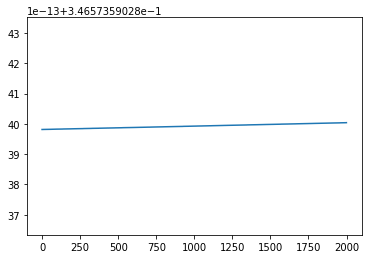

In [239]:
plt.plot(model.losses)

In [236]:
import sys
sys.path.insert(0, '../resources/')

In [237]:
from visualize import plot_decision_boundary

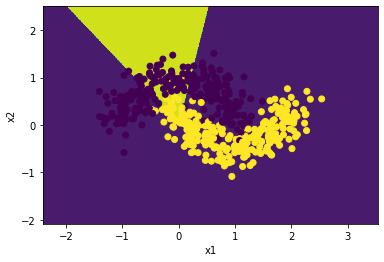

In [238]:
plot_decision_boundary(lambda x:model.predict(x),x,y)

In [196]:
len(model.params)//2 -1

4